In [1]:
# Importing libraries and modules required for the modelling process.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler

def run_models_and_feature_importance(df):
    # Splitting the dataset into 70% train and 30% test
    X = df.drop('DIABETE4', axis=1)
    y = df['DIABETE4']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize models
    rf_model = RandomForestClassifier(random_state=42)
    logreg_model = LogisticRegression(random_state=42, max_iter=1000)

    # Fit models
    rf_model.fit(X_train_scaled, y_train)
    logreg_model.fit(X_train_scaled, y_train)

    # Calculate accuracy for both models
    rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test_scaled))
    logreg_accuracy = accuracy_score(y_test, logreg_model.predict(X_test_scaled))

    # Calculate feature importances for Logistic Regression
    feature_importances_logreg = logreg_model.coef_[0]
    feature_importance_logreg_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_logreg})
    feature_importance_logreg_df.to_csv('feature_importance_logregV2.csv', index=False)

    # Calculate feature importances for Random Forest
    feature_importances_rf = rf_model.feature_importances_
    feature_importance_rf_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})
    feature_importance_rf_df.to_csv('feature_importance_rfV2.csv', index=False)

    return rf_accuracy, logreg_accuracy

# Load your dataset
data = pd.read_csv('Final_Predictor_Dataset.csv')

# Drop unnecessary columns and handle missing values
data = data.drop(columns=['SEQNO'])
data = data.dropna()
data = pd.get_dummies(data, drop_first=True)

# Run models and get accuracies and feature importances
rf_accuracy, logreg_accuracy = run_models_and_feature_importance(data)

print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"Logistic Regression Accuracy: {logreg_accuracy * 100:.2f}%")

Random Forest Accuracy: 85.80%
Logistic Regression Accuracy: 86.00%


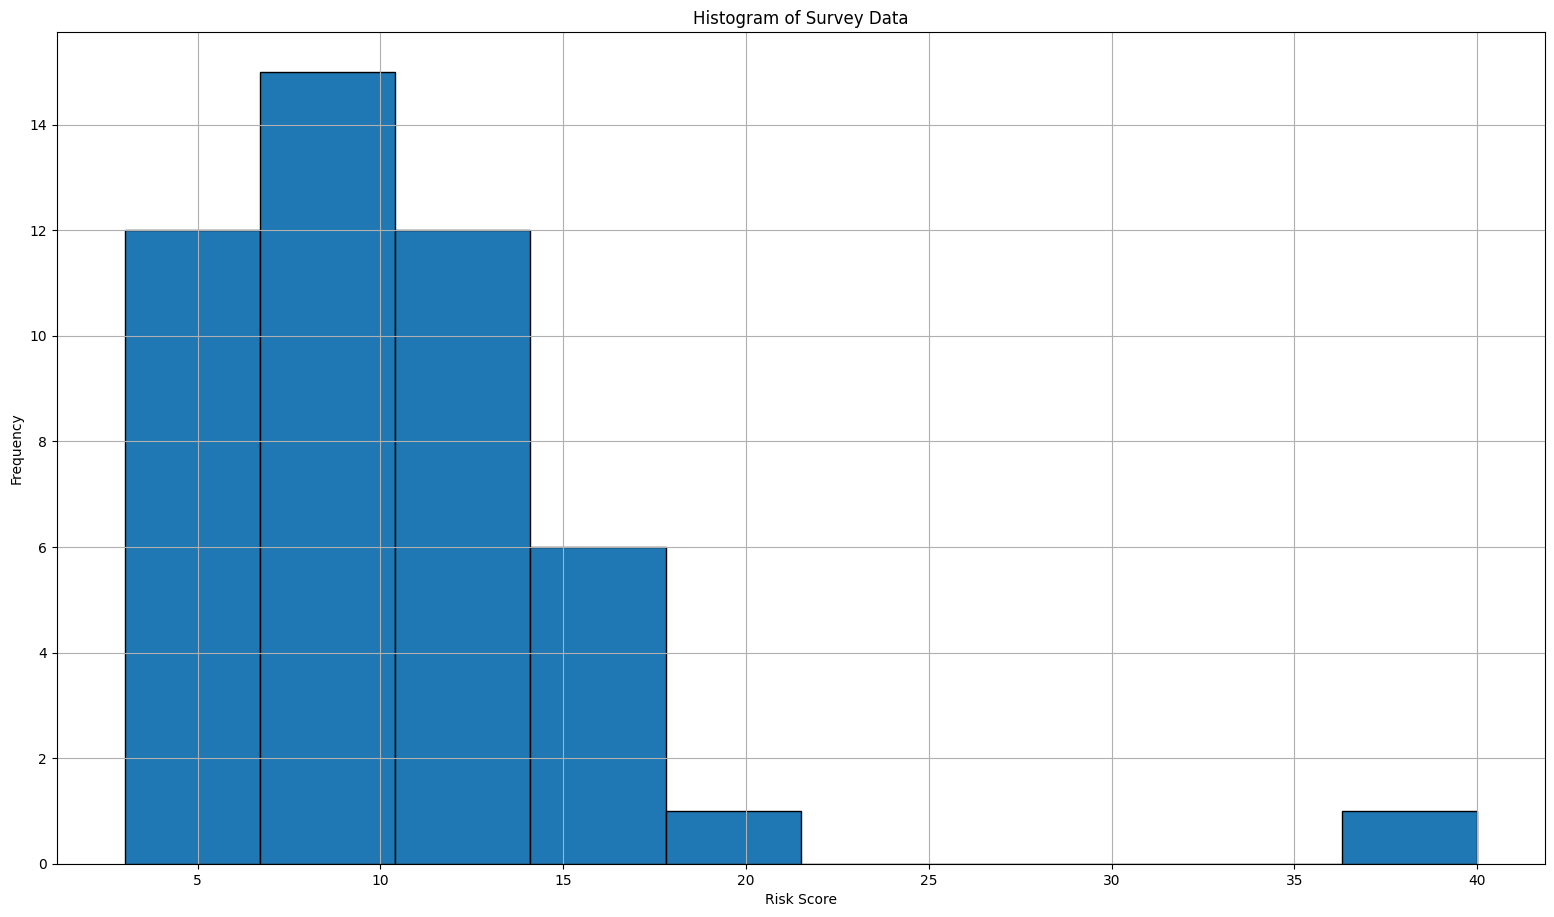

In [8]:
import matplotlib.pyplot as plt

# Given data, from the risk score calculation sheet
data = [8, 19, 10, 17, 13, 6, 4, 13, 8, 4, 5, 11, 13, 11, 3, 8, 5, 15, 6, 5, 8, 13, 14, 7,
        3, 10, 4, 10, 5, 15, 9, 15, 10, 10, 13, 10, 10, 11, 12, 17, 5, 10, 15, 12, 10, 13, 40]

# Create a DataFrame
df = pd.DataFrame({'Values': data})

# Plotting histogram
plt.figure(figsize=(19.20,10.80))
plt.hist(df['Values'], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Survey Data')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()